# TEWA 1 - Tutorial 4
## Permutation test and data visualization tutorial
23/March/2022


 Jozsef Arato



this tutorial is working on permutation test(also called randomization test), to compare data from 2 independent groups (as the independent samples t-test)


as discussed on Monday, permutation test is a way of randomly resampling the data, to create a distibution that would be expected based on chance (or under the null hypothesis)


we compare set of data sets of average reaction times (as treatment and control group)

### import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## the two datasets
- Below are the reaction time data for the treatment (data1) and control (data2) groups.
- between subject design

In [2]:
data1 = np.array(
    [
        444.48703626,
        420.71413104,
        482.04432447,
        380.46896668,
        420.56864234,
        474.09130417,
        414.9748433,
        450.15423802,
        436.53977461,
        500.12705411,
        405.00705696,
        419.3141794,
        460.46096974,
        450.54358948,
        420.93431563,
        467.40481135,
        510.84094939,
        482.61924772,
        480.32638462,
        510.76756724,
    ]
)

data2 = np.array(
    [
        420.1243685,
        501.25211241,
        454.37132587,
        600.39850065,
        501.79657108,
        481.94197109,
        469.51703441,
        449.82747137,
        450.98838458,
        477.15878941,
        570.00039675,
        460.18766471,
        432.70480616,
        480.38394358,
        478.46070285,
        485.71067427,
        487.91937261,
        505.86604195,
        495.8480102,
        480.9547509,
    ]
)

## data exploration
first step is to explore the two data sets:

1. print the mean for both groups
2. print the SD for both group
3. make a plot with two subplots, with a histogram for both groups
4. calculat the difference of means between the groups, and store it, called TrudeDiff


number of participants 20
average treatment reaction time 451.6194693265
average control reaction time 484.2706446675
standard deviations 35.82 40.57


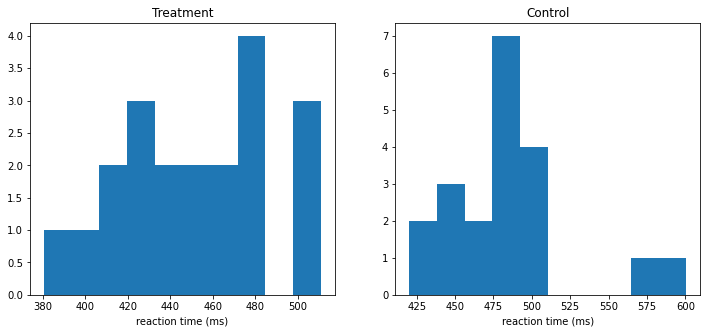

In [7]:
print("number of participants", len(data1 + data2))
print("average treatment reaction time", data1.mean())
print("average control reaction time", data2.mean())
print("standard deviations", np.round(np.std(data1), 2), np.round(np.std(data2), 2))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data1)
plt.xlabel("reaction time (ms)")
plt.title("Treatment")
plt.subplot(1, 2, 2)
plt.hist(data2)
plt.xlabel("reaction time (ms)")
plt.title("Control")

true_diff = data1.mean() - data2.mean()

## visualize the means with errorbars showing the standard deviaton

([<matplotlib.axis.XTick at 0x7ff995e0f2b0>,
 [Text(0, 0, 'Treatment'), Text(1, 0, 'Control')])

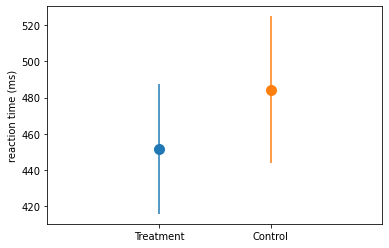

In [8]:
plt.figure()
plt.errorbar(0, np.mean(data1), np.std(data1), marker="o", markersize=10)
plt.errorbar(1, np.mean(data2), np.std(data2), marker="o", markersize=10)
plt.ylabel("reaction time (ms)")
plt.xlim([-1, 2])
plt.xticks(np.arange(2), ["Treatment", "Control"])

it is easy to do some more advanced visualization with matplotlib

([<matplotlib.axis.XTick at 0x7ff99668c700>,
 [Text(1, 0, 'Treatment'), Text(2, 0, 'Control')])

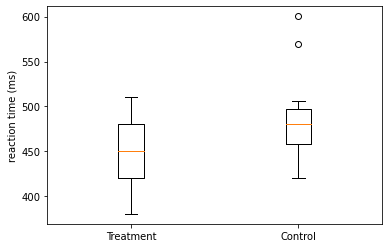

In [9]:
plt.boxplot([data1, data2])
plt.ylabel("reaction time (ms)")
plt.xticks(np.arange(1, 3), ["Treatment", "Control"])

## the core of the permutation test

now lets try to implement the permutations test

for these the main steps are:
 1. create a combined array containing the 2 data sets.
 2. randomly permute the combined array
 3. from the permuted array, select 2  groups (same size as the original groups)  
 4. calculate the mean difference between the 2 permuted groups
 5. store the permuted mean difference in a 1d array or a list
 6. repeat steps 2-5 2000 times


In [152]:
def perm_test(arr_1, arr_2, n_repetitions):
    res = []

    for i in range(n_repetitions):
        # 1
        arr_comb = np.concatenate((arr_1, arr_2))
        # 2
        arr_perm = np.random.permutation(arr_comb)
        # 3
        arr_split_1 = arr_perm[0 : int(len(arr_comb) / 2)]
        arr_split_2 = arr_perm[int(len(arr_comb) / 2) :]
        # 4
        mean_delta_perm = arr_split_1.mean() - arr_split_2.mean()
        # 5
        res.append(mean_delta_perm)

    return res


# 6 run function with 2000 repetitions

n_repetitions = 1_000_000

res = perm_test(data1, data2, n_repetitions=n_repetitions)

try to make your solution general -- that could work with data of any size and any permutations

## evaluation of results
Once this is done, calculate the p value of the true difference based on the permutation  
(using np.abs and np.sum)


hint: calculate how often chance produced a greater difference than the true difference


In [153]:
permuted_p = np.sum(np.abs(res > np.abs(true_diff))) / n_repetitions
print(permuted_p)

0.005436


## visualization
Once this is done we can evaluate of the result of the permutations visually

1. make a histogram, of the permuted differences.
2. mark it on the histogram with a vertical line, where the true difference falls.  with plt.plot 
in this case, you use plt.plot([xstart,xend],[ystart,yend],color='k')  -
if you add the same value for xstart and xend, we get a vertical line

3. using np.percentile, calculte thresholds for p<.05, and mark it with a vertical dashed lines (as in 3)





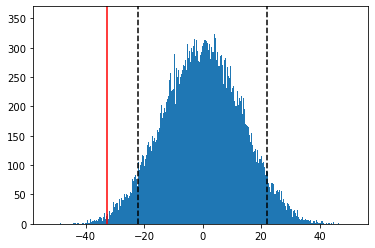

In [154]:
plt.hist(res, bins=10000)
plt.axvline(true_diff, color="red")
plt.axvline(np.percentile(res, 5), color="black", linestyle="dashed")
plt.axvline(np.percentile(res, 95), color="black", linestyle="dashed");

## compare to t-test
compare the result above with an independen sample t-test
for this, we import scipy.stats below, so it can be accessed as stats.ttest_ind

In [155]:
from scipy import stats

stats.ttest_ind(data1, data2)

Ttest_indResult(statistic=-2.629587192724802, pvalue=0.012273288618836418)

## alternative for t-test 
pingouin library

since this is not part of colab by default, we have to install it with !pip

In [156]:
#!pip install pingouin
import pingouin as pg

In [157]:
pg.ttest(data1, data2, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.629587,38,two-sided,0.012273,"[-57.79, -7.51]",0.831548,4.244,0.726643



## **homework**
## functions
now we are ready with the permutation test, now "re-cycle" your code from above, to make it into a function below.

This function should take 2 inputs (the 2 data-sets),
do the permuations as above, and return the permuted p-value.

Remember you can choose whatever variable names within the function, but best practice is not to use the same ones as for the code outside the function!

the function shoud not rely on any of the variables that are defined outside of the function: you can verify this by copy-pasting it into a new notebook and test it with some new data.




In [ ]:
def MyPermTest(#your code):
  #your code 
  #your code 
  return #your code 

 verify that your function works, with comparing it with your previous code
 

In [ ]:
# YOUR CODE

## now lets try the permutation test on some new data

In [ ]:
x1 = np.array(
    [
        200.48703626,
        420.71413104,
        482.04432447,
        380.46896668,
        420.56864234,
        474.09130417,
        414.9748433,
        450.15423802,
        436.53977461,
        500.12705411,
        405.00705696,
        419.3141794,
        460.46096974,
        450.54358948,
        420.93431563,
        467.40481135,
        510.84094939,
        482.61924772,
        480.32638462,
        860.56161,
    ]
)

x2 = np.array(
    [
        420.1243685,
        501.25211241,
        454.37132587,
        900.39850065,
        501.79657108,
        481.94197109,
        469.51703441,
        449.82747137,
        450.98838458,
        477.15878941,
        570.00039675,
        460.18766471,
        432.70480616,
        480.38394358,
        478.46070285,
        485.71067427,
        487.91937261,
        505.86604195,
        495.8480102,
        1500.5446,
    ]
)

explore these data-sets with histograms

now, we can easily use the function to compare other data-sets

for example X1 and X2 above
compare the result with the t-test

In [ ]:
my_perm_test(x1, x2)

log transform data before running the statistics

a common way to deal with data with large variability (eg: free viewing looking times) is to do a log transform.

1. make a scatter plot with the original data on the X and the raw data on the Y axis 
add both datasets to the same figure (using different colors)


2. run the permutation test and the t-test for the log-transformed datasets





### optional function parameters

until now we fixed the number of permutations in MyPermTest

make a new function, MyPermTestv2, with the only difference that there is a 3rd input variable, that controls the number of permutations


In [ ]:
def MyPermTestv2(#your code):
    #your code
#your code

once this is done, make a visualization of how the permuted p value changes as you change the number of permutations


1. use MyPermTestv2, to compare data1 and data2, with the number of permutations changing from 50 to 3000 in steps of 200  (use np.arange and a for cycle), at each step you only need to calcualte the permuted p-value
2. make a scatter plot, to visualize what you have calculate in 1.: the number of permutations on the x axis and the permuted p-value on the y-axis
3. add a horizontal line, that crosses the whole figure and shows the p-value obtained by  t-test

In [ ]:
# your code
# your code
# your code

### Bootstrapped confidence interval 

calculate the bootstrapped confidence interval for the mean of Data 1 and Data 2 with 2000 bootstraps. 
You can use np.random.choice ot perform sampling with replacemen- check the slided for more info.

after you have the 2000 sample means, you can use np.percentile to find the 95,99% confidence intervals

visualize what you found: if you use errobar, not that you can define positive and negative error differently (as a boostrapped confidence interval is not symmetric)

## homework 2- advanced


## data simulation and analysis

test permutation test and compare with the t-test with largely unequal sample sizes 

imagine a scenario where you research reaction times in a rare patient group
,so that you only have 5 patients.. obviously it is easier to get a large number of control participants, lets say 50

set mean=600 for patiens with SD of 100 (normal distribution)
set mean=550 for control with SD of 100 (uniform distribution)

1. make 2 data sets, patient group with N=5, the control group with N=50, 
2. compare them with the t-test
3. compare them using the permutation test
4. repeat this process multiple times, and systematically compare (with for cycle and visualization) the similarity between permuation and t-test result


